In [2]:
data = read.csv('Social_Network_Ads.csv')
head(data)
data= data[3:5]

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [3]:
data$Purchased = factor(data$Purchased, levels= c(0,1))

In [5]:
library(caTools)
set.seed(101)
split = sample.split(data$Purchased, SplitRatio=0.75)
training_set = subset(data, split==TRUE)
test_set = subset(data, split==FALSE)

In [6]:
#Feature Scaling
training_set[-3]= scale(training_set[-3])
test_set[-3]= scale(test_set[-3])

In [7]:
#Fitting Logistic Regression on Training set. Always remember Logistics regression returns probabilities
classifier = glm(formula = Purchased~., family= binomial, data= training_set)

In [9]:
#Predicting test results
prob_pred = predict(classifier, type= 'response', newdata = test_set[-3])
y_pred = ifelse(prob_pred>0.5, 1, 0)

In [10]:
#Confusion Matrix
table(test_set[,3], y_pred>0.5)

   
    FALSE TRUE
  0    58    6
  1    13   23

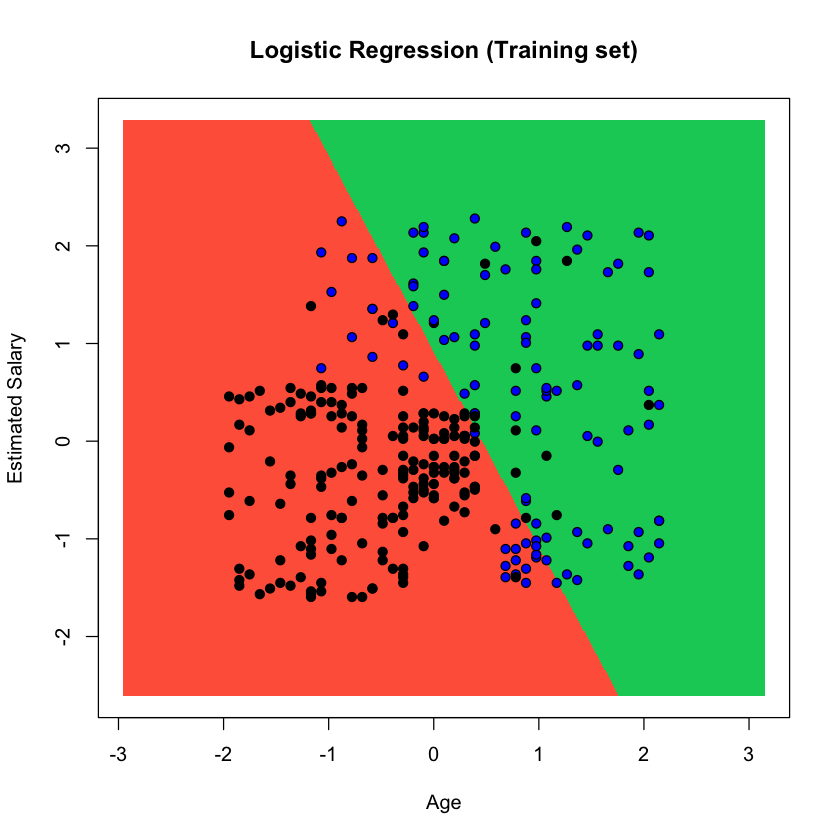

In [13]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'blue', 'black'))

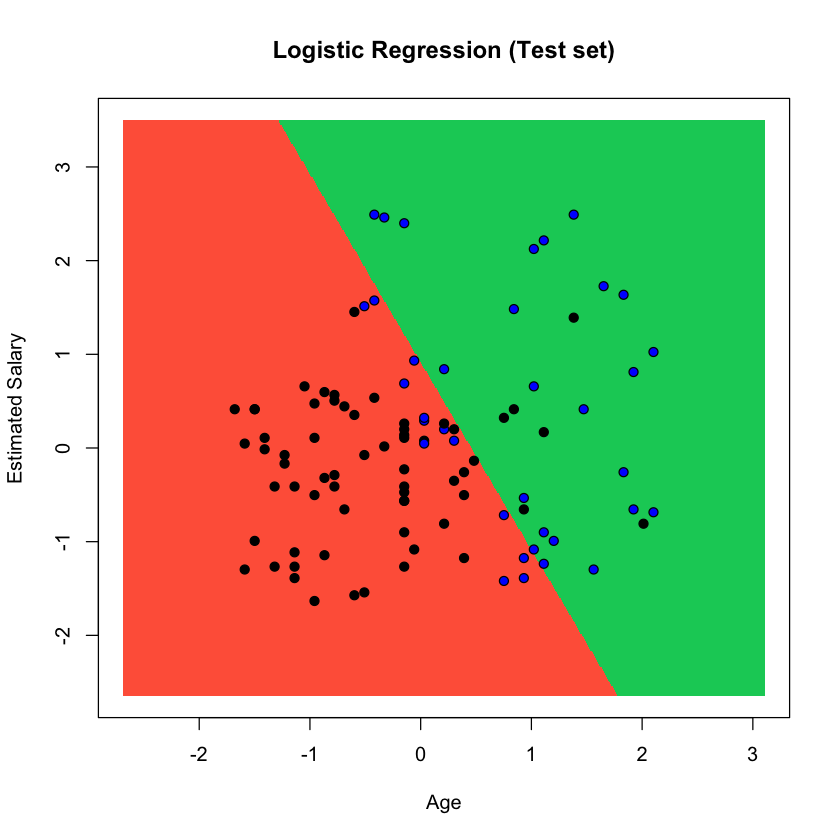

In [14]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'blue', 'black'))